<a href="https://colab.research.google.com/github/annsyj94/YouTube-Trends-2021/blob/main/YouTube_Video_Category_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Types of YouTube videos in 2021 ***

This task was helping my colleague for planning YouTube strategy in the future.

(World Smart Sustainable Cities Organization) 

In [95]:
% matplotlib inline 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [96]:
# Read the document 
yvd = pd.read_csv("Youtube Video Dataset.csv")
yvd.head(5)

,Title,Videourl,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,/watch?v=EwBA1fOQ96c,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,/watch?v=0SPwwpruGIA,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,/watch?v=upfu5nQB2ks,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,/watch?v=xFRzzSF_6gk,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,/watch?v=K79bXtaRwcM,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [97]:
# Delete the column ""
yvd = yvd.drop(["Videourl"],axis=1)
yvd.head(5)

,Title,Category,Description
0,Madagascar Street Food!!! Super RARE Malagasy ...,Food,🎥GIANT ALIEN SNAIL IN JAPAN! » https://youtu.b...
1,42 Foods You Need To Eat Before You Die,Food,This is the ultimate must-try food bucket list...
2,Gordon Ramsay’s Top 5 Indian Dishes,Food,We found 5 of the best and most interesting In...
3,How To Use Chopsticks - In About A Minute 🍜,Food,You're most likely sitting in a restaurant wit...
4,Trying Indian Food 1st Time!,Food,HELP SUPPORT SINSTV!! Shop Our Sponsors!\nLast...


In [98]:
yvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        11211 non-null  object
 1   Category     11211 non-null  object
 2   Description  11128 non-null  object
dtypes: object(3)
memory usage: 262.9+ KB


In [99]:
yvd.Category.value_counts()

travel blog           2200
Science&Technology    2074
Food                  1828
Art&Music             1765
manufacturing         1699
History               1645
Name: Category, dtype: int64

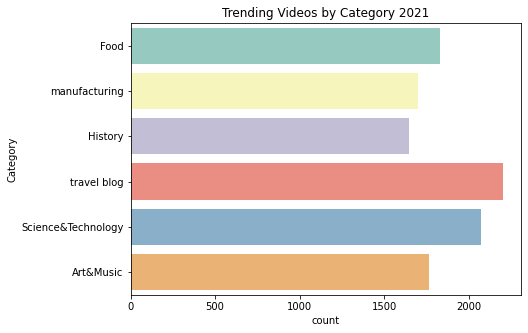

In [100]:
# Create a horizontal bar chart 
plt.figure(figsize=(7,5))
sns.countplot(data=yvd, y="Category",palette="Set3")
plt.title("Trending Videos by Category 2021")
plt.show()

In [102]:
yvd2=yvd.dropna()

data = yvd2["Description"]
target = yvd2["Category"]

In [103]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(stop_words="english", max_features = 2000)
train = vector.fit_transform(data)
train.shape

(11128, 2000)

In [104]:
pca = PCA(n_components=2)
train_dimension = pca.fit_transform(train.toarray())

dataframe = pd.DataFrame(train_dimension)
dataframe.columns=["m1","m2"]
dataframe["Category"] = target 
dataframe.head(6)

,m1,m2,Category
0,-0.070851,0.013515,Food
1,-0.044598,0.073169,Food
2,0.126025,-0.014464,Food
3,0.032305,0.142798,Food
4,0.119177,0.158408,Food
5,0.017445,0.075147,Food


<Figure size 1080x1080 with 0 Axes>

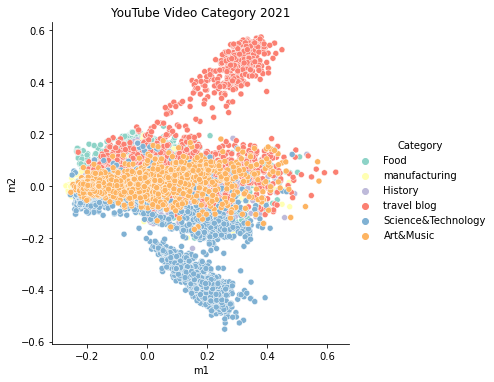

In [105]:
plt.figure(figsize=(15,15))
sns.relplot(data=dataframe, x="m1",y="m2", hue="Category",palette="Set3")
plt.title("Trending Videos by Category 2021")
plt.show()